In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path =r'D:\IIITNR\ACN\project\data-1\stateless\benign'
filenames = glob.glob(path + "/*")
print(filenames)

['D:\\IIITNR\\ACN\\project\\data-1\\stateless\\benign\\stateless_features-benign_heavy_1.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\benign\\stateless_features-benign_heavy_2.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\benign\\stateless_features-benign_heavy_3.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\benign\\stateless_features-light_benign.pcap.csv']


In [3]:
label = 'benign'
for path in filenames:
    filename = (path.split('.')[0]).split('\\')[-1]
    print(filename)
    df = pd.read_csv(path)
    df['Label'] = label
    outdir = 'labeled\benign_labeled'
    if not os.path.exists(outdir):
         os.makedirs(outdir)
    outcsv_name = filename + '.csv'
    df.to_csv(os.path.join(outdir, outcsv_name), index=False)


stateless_features-benign_heavy_1
stateless_features-benign_heavy_2
stateless_features-benign_heavy_3
stateless_features-light_benign


In [4]:
path =r'D:\IIITNR\ACN\project\data-1\stateless\light_attack'
filenames = glob.glob(path + "/*")
print(filenames)

['D:\\IIITNR\\ACN\\project\\data-1\\stateless\\light_attack\\stateless_features-light_audio.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\light_attack\\stateless_features-light_compressed.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\light_attack\\stateless_features-light_exe.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\light_attack\\stateless_features-light_image.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\light_attack\\stateless_features-light_text.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\light_attack\\stateless_features-light_video.pcap.csv']


In [5]:
label = 'light_attack'
for path in filenames:
    filename = (path.split('.')[0]).split('\\')[-1]
    print(filename)
    df = pd.read_csv(path)
    df['Label'] = label
    outdir = 'labeled\light_attack_labeled'
    if not os.path.exists(outdir):
         os.makedirs(outdir)
    outcsv_name = filename + '.csv' 
    df.to_csv(os.path.join(outdir, outcsv_name), index=False)


stateless_features-light_audio
stateless_features-light_compressed
stateless_features-light_exe
stateless_features-light_image
stateless_features-light_text
stateless_features-light_video


In [6]:
path =r'D:\IIITNR\ACN\project\data-1\stateless\heavy_attack'
filenames = glob.glob(path + "/*")
print(filenames)

['D:\\IIITNR\\ACN\\project\\data-1\\stateless\\heavy_attack\\stateless_features-heavy_audio.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\heavy_attack\\stateless_features-heavy_compressed.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\heavy_attack\\stateless_features-heavy_exe.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\heavy_attack\\stateless_features-heavy_image.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\heavy_attack\\stateless_features-heavy_text.pcap.csv', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\heavy_attack\\stateless_features-heavy_video.pcap.csv']


In [7]:
label = 'heavy_attack'
for path in filenames:
    filename = (path.split('.')[0]).split('\\')[-1]
    print(filename)
    df = pd.read_csv(path)
    df['Label'] = label
    outdir = 'labeled\heavy_attack_labeled'
    if not os.path.exists(outdir):
         os.makedirs(outdir)
    outcsv_name = filename + '.csv' 
    df.to_csv(os.path.join(outdir, outcsv_name), index=False)


stateless_features-heavy_audio
stateless_features-heavy_compressed
stateless_features-heavy_exe
stateless_features-heavy_image
stateless_features-heavy_text
stateless_features-heavy_video


## Merge CSVs

In [8]:
path = r'D:\IIITNR\ACN\project\data-1\stateless\labeled'
folders_path = glob.glob(path + "/*")
print(folders_path)

['D:\\IIITNR\\ACN\\project\\data-1\\stateless\\labeled\\benign_labeled', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\labeled\\heavy_attack_labeled', 'D:\\IIITNR\\ACN\\project\\data-1\\stateless\\labeled\\light_attack_labeled']


In [9]:
all_csvs = []
for folder in folders_path:
    # csv_name = folder.split('\\')[-1]
    # print(csv_name)
    filepaths = glob.glob(folder + '/*')
    for path in filepaths:
        all_csvs.append(path)
    
combined_df = pd.concat(pd.read_csv(path) for path in all_csvs)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df.to_csv('CIC-Bell-DNS-EXF-2021_stateless.csv', index=False)

In [10]:
# make a copy of the dataframe
data = combined_df.copy()
data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,2020-11-22 14:09:57.523605,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,benign
1,2020-11-25 01:38:53.048899,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,heavy_attack
2,2020-11-24 16:27:06.336674,25,8,0,10,9,2.786216,6,6,7,3.333333,2,192,12,1,benign
3,2020-11-21 18:04:09.979832,13,3,0,9,2,2.514247,2,3,6,3.666667,lite,lite14,10,1,benign
4,2020-11-24 19:13:18.189963,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,heavy_attack


### DATA ANALYSIS

In [11]:
data.tail()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
536133,2020-11-24 20:39:35.846862,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,heavy_attack
536134,2020-11-22 12:23:28.524878,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,benign
536135,2020-11-21 16:03:22.888025,14,0,0,12,0,2.781301,2,2,10,6.500000,japan,japan-goto,11,0,benign
536136,2020-11-23 01:10:38.901958,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,heavy_attack
536137,2020-11-21 18:01:58.817202,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,benign


### Since timestamp doesn't contribute as a feature so we will remove it from data for further analysis and training. Also, longest_word,  and sld these two features have a large number of categorical values their meanings are not clear, therefore, we will remove these two features as well.

In [12]:
data_new = data.drop(['timestamp', 'longest_word', 'sld'], axis=1)
data_new.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
0,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,benign
1,24,7,0,10,8,2.054029,6,6,7,3.166667,11,1,heavy_attack
2,25,8,0,10,9,2.786216,6,6,7,3.333333,12,1,benign
3,13,3,0,9,2,2.514247,2,3,6,3.666667,10,1,benign
4,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,heavy_attack


In [13]:
data_new.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
count,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000
mean,22.345262,6.100633,0.849604,10.412959,6.539344,2.485026,4.543355,4.806201,8.240375,4.794970,12.587228,0.757902
std,5.968281,3.883699,4.951571,3.226364,4.482443,0.407780,2.193396,1.796751,4.408849,4.579084,4.173231,0.428354
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,1.500000,2.000000,0.000000
25%,19.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,11.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000
max,36.000000,29.000000,32.000000,34.000000,12.000000,4.368167,8.000000,7.000000,32.000000,32.000000,35.000000,1.000000


In [14]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        536138 non-null  int64  
 1   subdomain_length  536138 non-null  int64  
 2   upper             536138 non-null  int64  
 3   lower             536138 non-null  int64  
 4   numeric           536138 non-null  int64  
 5   entropy           536138 non-null  float64
 6   special           536138 non-null  int64  
 7   labels            536138 non-null  int64  
 8   labels_max        536138 non-null  int64  
 9   labels_average    536138 non-null  float64
 10  len               536138 non-null  int64  
 11  subdomain         536138 non-null  int64  
 12  Label             536138 non-null  object 
dtypes: float64(2), int64(10), object(1)
memory usage: 53.2+ MB


In [15]:
# Check for Missing Values
print(data_new.isnull().sum())

FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
len                 0
subdomain           0
Label               0
dtype: int64


In [16]:
# check if data is imbalanced 
data_new.Label.value_counts()

heavy_attack    251670
benign          241785
light_attack     42683
Name: Label, dtype: int64

In [17]:
# calculate the fraction of the data corresponding to each class
benign_frc = 241785/len(data_new)
heavy_attack_frc = 251670/len(data_new)
light_attack_frc =  42683/len(data_new)
print(benign_frc, heavy_attack_frc, light_attack_frc)

0.4509753085959212 0.4694127258280517 0.07961196557602707


Text(0, 0.5, 'Frequency')

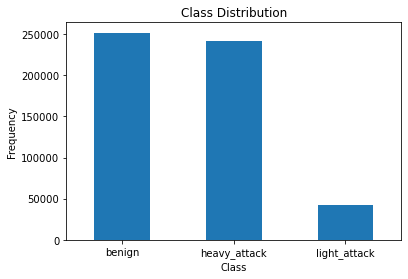

In [18]:
# Let's plot class against frequency
labels = ['benign', 'heavy_attack', 'light_attack']
classes = data_new.Label.value_counts()
classes.plot(kind = 'bar',rot = 0)
plt.title("Class Distribution")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

### DATA CLEANING

In [19]:
# Check duplicate values
data_new.duplicated().sum()

529668

In [20]:
# remove duplicate rows
data_dupl_drop = data_new.drop_duplicates()
data_dupl_drop.shape

(6470, 13)

In [21]:
# check if data is imbalanced 
data_dupl_drop.Label.value_counts()

benign          6331
heavy_attack      90
light_attack      49
Name: Label, dtype: int64

In [22]:
# calculate the fraction of the data corresponding to each class
benign_frc_final = 6331/len(data_dupl_drop)
heavy_attack_frc_final = 90/len(data_dupl_drop)
light_attack_frc_final =  49/len(data_dupl_drop)
print(benign_frc_final, heavy_attack_frc_final, light_attack_frc_final)

0.978516228748068 0.013910355486862442 0.007573415765069552


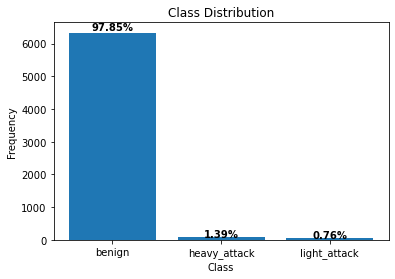

In [32]:
labels = ['benign', 'heavy_attack', 'light_attack']
classes = data_dupl_drop.Label.value_counts()

total = classes.sum()
# calculate percentage
percentage = []
for i in range(len(classes)):
    pct = (classes[i] / total) * 100
    percentage.append(round(pct,2))
graph = plt.bar(classes.index, classes.values)
plt.title("Class Distribution")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency") 

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y1 = p.get_xy()
    plt.text(x+width/2,
             y1+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.savefig("Class_distribution_imbalanced.png")

In [33]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Label']= label_encoder.fit_transform(df['Label'])

df['Label'].unique()


array([0])

In [34]:
# copy the data
df_min_max_scaled = data_dupl_drop.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns[:-1]:
    df_min_max_scaled[column] =(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
df_min_max_scaled.head()


,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
0,0.647059,0.241379,0.0,0.294118,0.666667,0.442238,0.75,0.833333,0.166667,0.054645,0.272727,1.0,benign
1,0.647059,0.241379,0.0,0.294118,0.666667,0.442238,0.75,0.833333,0.166667,0.054645,0.272727,1.0,heavy_attack
2,0.676471,0.275862,0.0,0.294118,0.750000,0.618712,0.75,0.833333,0.166667,0.060109,0.303030,1.0,benign
3,0.323529,0.103448,0.0,0.264706,0.166667,0.553161,0.25,0.333333,0.133333,0.071038,0.242424,1.0,benign
4,0.705882,0.310345,0.0,0.294118,0.833333,0.608137,0.75,0.833333,0.166667,0.065574,0.333333,1.0,heavy_attack


In [35]:
X = df_min_max_scaled.drop(['Label'], axis=1)
X.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
0,0.647059,0.241379,0.0,0.294118,0.666667,0.442238,0.75,0.833333,0.166667,0.054645,0.272727,1.0
1,0.647059,0.241379,0.0,0.294118,0.666667,0.442238,0.75,0.833333,0.166667,0.054645,0.272727,1.0
2,0.676471,0.275862,0.0,0.294118,0.750000,0.618712,0.75,0.833333,0.166667,0.060109,0.303030,1.0
3,0.323529,0.103448,0.0,0.264706,0.166667,0.553161,0.25,0.333333,0.133333,0.071038,0.242424,1.0
4,0.705882,0.310345,0.0,0.294118,0.833333,0.608137,0.75,0.833333,0.166667,0.065574,0.333333,1.0


In [47]:
y = df_min_max_scaled['Label']
y.head()

0          benign
1    heavy_attack
2          benign
3          benign
4    heavy_attack
Name: Label, dtype: object

In [37]:
from sklearn.model_selection import train_test_split

# Splitting the data - 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (4529, 12)
Testing split input-  (1941, 12)


## Train And Test

In [38]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.tree import plot_tree

## Decision Tree Classifier: Baseline model

In [39]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


## Testing

In [40]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

      benign       0.98      0.98      0.98      1897
heavy_attack       0.12      0.09      0.10        32
light_attack       0.00      0.00      0.00        12

    accuracy                           0.96      1941
   macro avg       0.37      0.36      0.36      1941
weighted avg       0.96      0.96      0.96      1941



In [41]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1867,   21,    9],
       [  20,    3,    9],
       [  10,    2,    0]], dtype=int64)

## To treat imbalanced data, We will use upsampling technique and mixed (upsampling and downsampling) techniques.

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

## SMOTE

In [43]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_res=='light_attack')))
print("After OverSampling, counts of label '0': {}".format(sum(y_res=='benign')))
print("After OverSampling, counts of label '1': {}".format(sum(y_res=='heavy_attack')))

After OverSampling, the shape of train_X: (18993, 12)
After OverSampling, the shape of train_y: (18993,) 

After OverSampling, counts of label '1': 6331
After OverSampling, counts of label '0': 6331
After OverSampling, counts of label '2': 6331


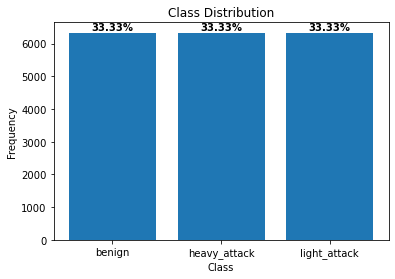

In [48]:
labels = ['benign', 'heavy_attack', 'light_attack']
classes = y_res.value_counts()

total = classes.sum()
# calculate percentage
percentage = []
for i in range(len(classes)):
    pct = (classes[i] / total) * 100
    percentage.append(round(pct,2))
graph = plt.bar(classes.index, classes.values)
plt.title("Class Distribution")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency") 

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y2 = p.get_xy()
    plt.text(x+width/2,
             y2+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.savefig("Class_distribution_balanced_smote.png")

In [38]:
# Splitting upsampled data - into 70:30 ratio
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res , y_res, test_size = 0.3, random_state = 0)
print("Training split input- ", X_train_res.shape)
print("Testing split input- ", X_test_res.shape)

Training split input-  (13295, 12)
Testing split input-  (5698, 12)


In [39]:
# Defining the decision tree algorithm
dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train_res, y_train_res)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [40]:
y_pred1_t = dtree1.predict(X_test_res)
print("Classification report - \n", classification_report(y_test_res, y_pred1_t))

Classification report - 
               precision    recall  f1-score   support

      benign       0.97      0.97      0.97      1822
heavy_attack       0.73      0.74      0.74      1955
light_attack       0.74      0.73      0.74      1921

    accuracy                           0.81      5698
   macro avg       0.81      0.81      0.81      5698
weighted avg       0.81      0.81      0.81      5698



In [41]:
cm1_t = confusion_matrix(y_test_res, y_pred1_t)
cm1_t

array([[1772,   36,   14],
       [  38, 1445,  472],
       [  19,  495, 1407]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.8115128115128115')

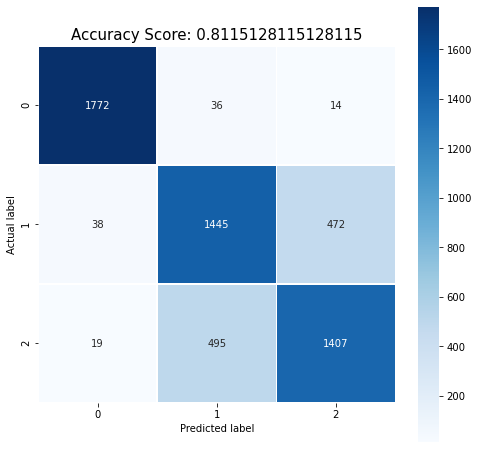

In [42]:
plt.figure(figsize=(8,8))

sns.heatmap(data=cm1_t, linewidths=.5, annot=True, square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree1.score(X_test_res, y_test_res))
plt.title(all_sample_title, size = 15)

#plt.savefig("one.png")

### Naive Bayes classifier

In [43]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb1 = GaussianNB()

#Train the model using the training sets
gnb1.fit(X_train_res, y_train_res)

GaussianNB()

In [44]:
# Predicting the values of test data
y_pred_gnb1 = gnb1.predict(X_test_res)
print("Classification report - \n", classification_report(y_test_res,y_pred_gnb1))

Classification report - 
               precision    recall  f1-score   support

      benign       0.56      0.95      0.70      1822
heavy_attack       0.61      0.31      0.41      1955
light_attack       0.56      0.47      0.51      1921

    accuracy                           0.57      5698
   macro avg       0.58      0.58      0.54      5698
weighted avg       0.58      0.57      0.54      5698



Text(0.5, 1.0, 'Accuracy Score: 0.568971568971569')

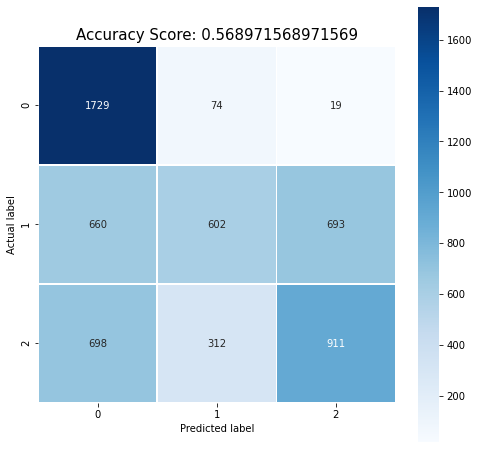

In [45]:
cm_gnb1 = confusion_matrix(y_test_res, y_pred_gnb1)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_gnb1,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_gnb1 = 'Accuracy Score: {0}'.format(gnb1.score(X_test_res, y_test_res))
plt.title(all_sample_title_gnb1, size = 15)

# plt.savefig("one.png")

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Rf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
Rf1.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [47]:
# Predicting the values of test data
y_pred_Rf1 = Rf1.predict(X_test_res)
print("Classification report - \n", classification_report(y_test_res, y_pred_Rf1))

Classification report - 
               precision    recall  f1-score   support

      benign       0.98      0.98      0.98      1822
heavy_attack       0.75      0.74      0.74      1955
light_attack       0.74      0.75      0.75      1921

    accuracy                           0.82      5698
   macro avg       0.82      0.82      0.82      5698
weighted avg       0.82      0.82      0.82      5698



Text(0.5, 1.0, 'Accuracy Score: 0.8215163215163215')

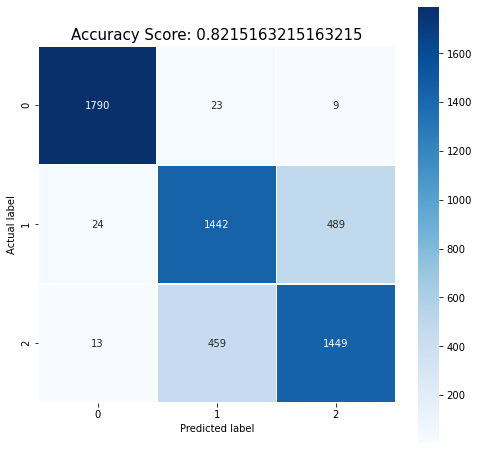

In [48]:
cm_Rf1 = confusion_matrix(y_test_res, y_pred_Rf1)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_Rf1,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_Rf1 = 'Accuracy Score: {0}'.format(Rf1.score(X_test_res, y_test_res))
plt.title(all_sample_title_Rf1, size = 15)

#plt.savefig("one.png")

### Adaboost classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc1 = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model1 = abc1.fit(X_train_res, y_train_res)

In [50]:
# Predicting the values of test data
y_pred_abc1 = model1.predict(X_test_res)
print("Classification report - \n", classification_report(y_test_res, y_pred_abc1))

Classification report - 
               precision    recall  f1-score   support

      benign       0.93      0.92      0.92      1822
heavy_attack       0.58      0.51      0.54      1955
light_attack       0.58      0.67      0.62      1921

    accuracy                           0.69      5698
   macro avg       0.70      0.70      0.70      5698
weighted avg       0.69      0.69      0.69      5698



Text(0.5, 1.0, 'Accuracy Score: 0.6928746928746928')

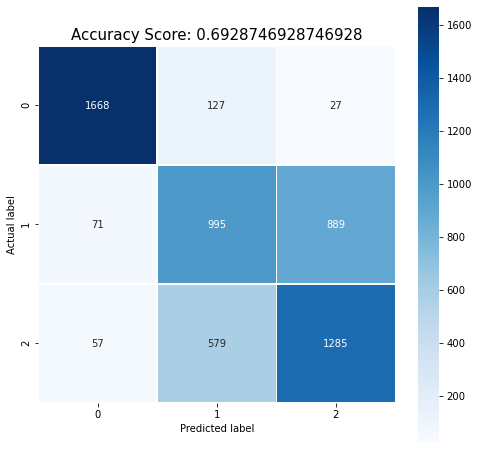

In [51]:
cm_abc1 = confusion_matrix(y_test_res, y_pred_abc1)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_abc1,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_abc1 = 'Accuracy Score: {0}'.format(model1.score(X_test_res, y_test_res))
plt.title(all_sample_title_abc1, size = 15)

# plt.savefig("one.png")

### SMOTEENN

In [49]:
from collections import Counter
sme = SMOTEENN(random_state=42)
X_res1, y_res1 = sme.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res1))

Resampled dataset shape Counter({'benign': 5985, 'heavy_attack': 3675, 'light_attack': 3186})


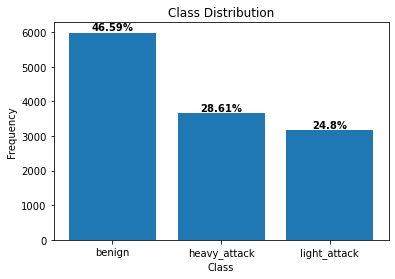

In [50]:
labels = ['benign', 'heavy_attack', 'light_attack']
classes = y_res1.value_counts()

total = classes.sum()
# calculate percentage
percentage = []
for i in range(len(classes)):
    pct = (classes[i] / total) * 100
    percentage.append(round(pct,2))
graph = plt.bar(classes.index, classes.values)
plt.title("Class Distribution")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency") 

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y3 = p.get_xy()
    plt.text(x+width/2,
             y3+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.savefig("Class_distribution_balanced_smoteenn.png")

In [53]:
# Splitting upsampled data - into 70:30 ratio
X_train_res1, X_test_res1, y_train_res1, y_test_res1 = train_test_split(X_res1 , y_res1, test_size = 0.3, random_state = 0)
print("Training split input- ", X_train_res1.shape)
print("Testing split input- ", X_test_res1.shape)

Training split input-  (9039, 12)
Testing split input-  (3874, 12)


In [54]:
# Defining the decision tree algorithm
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train_res1, y_train_res1)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [55]:
# Predicting the values of test data
y_pred_dt2 = dtree2.predict(X_test_res1)
print("Classification report - \n", classification_report(y_test_res1,y_pred_dt2))

Classification report - 
               precision    recall  f1-score   support

      benign       0.99      0.99      0.99      1748
heavy_attack       0.96      0.96      0.96      1123
light_attack       0.95      0.96      0.95      1003

    accuracy                           0.97      3874
   macro avg       0.97      0.97      0.97      3874
weighted avg       0.97      0.97      0.97      3874



In [56]:
cm_dt2 = confusion_matrix(y_test_res1, y_pred_dt2)
cm_dt2

array([[1729,    7,   12],
       [   6, 1076,   41],
       [   4,   37,  962]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9723799690242644')

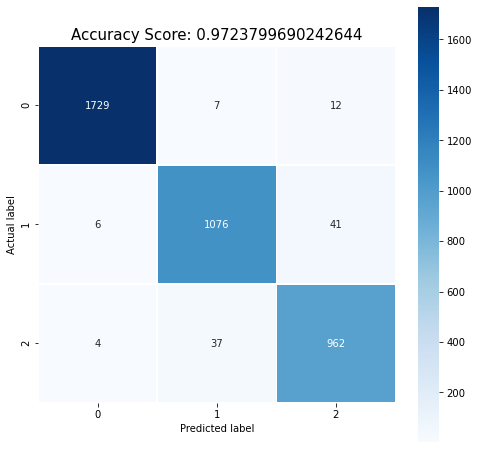

In [57]:
#cm_dt2 = confusion_matrix(y_test, y_pred_dt2)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_dt2,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_dt2 = 'Accuracy Score: {0}'.format(dtree2.score(X_test_res1, y_test_res1))
plt.title(all_sample_title_dt2, size = 15)

# plt.savefig("one.png")

### Naive Bayes Classifier

In [58]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb2 = GaussianNB()

#Train the model using the training sets
gnb2.fit(X_train_res1, y_train_res1)


GaussianNB()

In [59]:
# Predicting the values of test data
y_pred_gnb2 = gnb2.predict(X_test_res1)
print("Classification report - \n", classification_report(y_test_res1, y_pred_gnb2))

Classification report - 
               precision    recall  f1-score   support

      benign       0.60      0.99      0.75      1748
heavy_attack       0.61      0.27      0.37      1123
light_attack       0.68      0.32      0.44      1003

    accuracy                           0.61      3874
   macro avg       0.63      0.53      0.52      3874
weighted avg       0.62      0.61      0.56      3874



Text(0.5, 1.0, 'Accuracy Score: 0.6084150748580279')

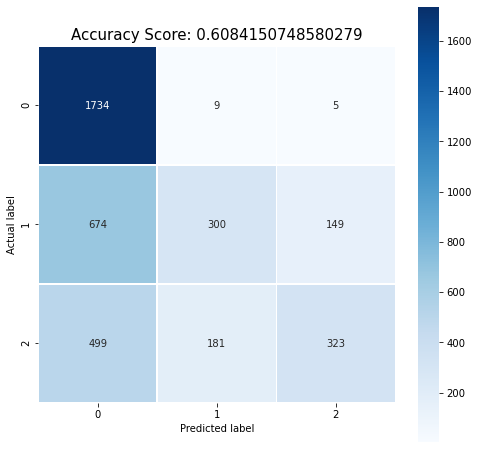

In [60]:
cm_gnb2 = confusion_matrix(y_test_res1, y_pred_gnb2)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_gnb2,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_gnb2 = 'Accuracy Score: {0}'.format(gnb2.score(X_test_res1, y_test_res1))
plt.title(all_sample_title_gnb2, size = 15)

# plt.savefig("one.png")

### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Rf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
Rf2.fit(X_train_res1,y_train_res1)

RandomForestClassifier()

In [62]:
# Predicting the values of test data
y_pred_Rf2 = Rf2.predict(X_test_res1)
print("Classification report - \n", classification_report(y_test_res1, y_pred_Rf2))

Classification report - 
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00      1748
heavy_attack       0.98      0.98      0.98      1123
light_attack       0.97      0.97      0.97      1003

    accuracy                           0.99      3874
   macro avg       0.98      0.98      0.98      3874
weighted avg       0.99      0.99      0.99      3874



Text(0.5, 1.0, 'Accuracy Score: 0.9855446566855963')

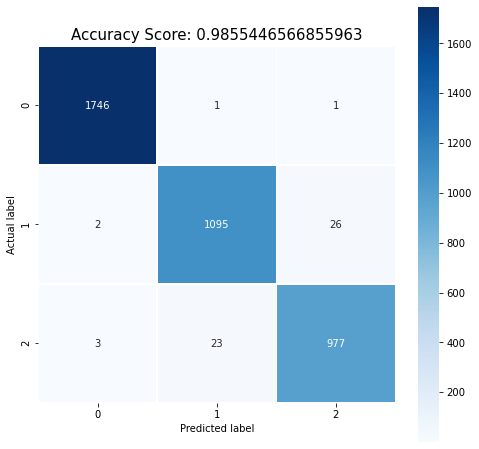

In [63]:
cm_Rf2 = confusion_matrix(y_test_res1, y_pred_Rf2)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_Rf2, linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_Rf2 = 'Accuracy Score: {0}'.format(Rf2.score(X_test_res1, y_test_res1))
plt.title(all_sample_title_Rf2, size = 15)

# plt.savefig("one.png")

### Adaboost CLassfier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc2 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
abc2.fit(X_train_res1, y_train_res1)


AdaBoostClassifier(learning_rate=1)

In [65]:
# Predicting the values of test data
y_pred_abc2 = abc2.predict(X_test_res1)
print("Classification report - \n", classification_report(y_test_res1,y_pred_abc2))

Classification report - 
               precision    recall  f1-score   support

      benign       0.95      0.94      0.94      1748
heavy_attack       0.64      0.82      0.72      1123
light_attack       0.76      0.53      0.63      1003

    accuracy                           0.80      3874
   macro avg       0.78      0.76      0.76      3874
weighted avg       0.81      0.80      0.80      3874



Text(0.5, 1.0, 'Accuracy Score: 0.7994321115126485')

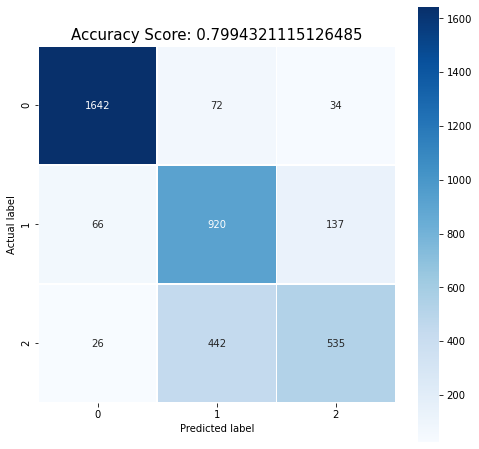

In [66]:
cm_abc2 = confusion_matrix(y_test_res1, y_pred_abc2)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_abc2,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_abc2 = 'Accuracy Score: {0}'.format(abc2.score(X_test_res1, y_test_res1))
plt.title(all_sample_title_abc2, size = 15)

# plt.savefig("one.png")

### SMOTETomek

In [51]:
smt = SMOTETomek(random_state=42)
X_res2, y_res2 = smt.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({'benign': 6327, 'light_attack': 5387, 'heavy_attack': 5385})


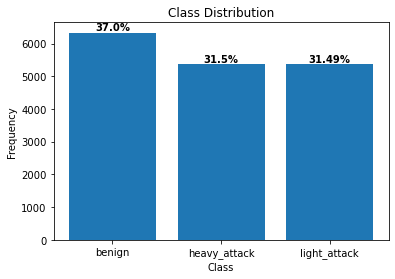

In [52]:
labels = ['benign', 'heavy_attack', 'light_attack']
classes = y_res2.value_counts()

total = classes.sum()
# calculate percentage
percentage = []
for i in range(len(classes)):
    pct = (classes[i] / total) * 100
    percentage.append(round(pct,2))
graph = plt.bar(classes.index, classes.values)
plt.title("Class Distribution")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency") 

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y3 = p.get_xy()
    plt.text(x+width/2,
             y3+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.savefig("Class_distribution_balanced_smoteTomek.png")

In [68]:
# Splitting upsampled data - into 70:30 ratio
X_train_res2, X_test_res2, y_train_res2, y_test_res2 = train_test_split(X_res2 , y_res2, test_size = 0.3, random_state = 0)
print("Training split input- ", X_train_res2.shape)
print("Testing split input- ", X_test_res2.shape)

Training split input-  (11979, 12)
Testing split input-  (5134, 12)


In [69]:
# Defining the decision tree algorithm
dtree3 = DecisionTreeClassifier()
dtree3.fit(X_train_res2, y_train_res2)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [70]:
# Predicting the values of test data
y_pred_dt3 = dtree3.predict(X_test_res2)
print("Classification report - \n", classification_report(y_test_res2, y_pred_dt3))

Classification report - 
               precision    recall  f1-score   support

      benign       0.98      0.99      0.98      1838
heavy_attack       0.85      0.83      0.84      1691
light_attack       0.84      0.84      0.84      1605

    accuracy                           0.89      5134
   macro avg       0.89      0.89      0.89      5134
weighted avg       0.89      0.89      0.89      5134



Text(0.5, 1.0, 'Accuracy Score: 0.8909232567199065')

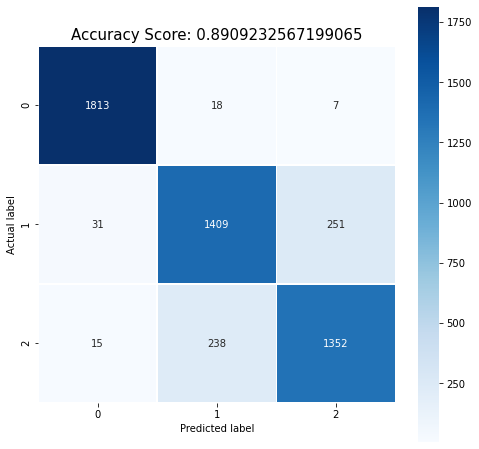

In [71]:
cm_dt3 = confusion_matrix(y_test_res2, y_pred_dt3)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_dt3,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_dt3 = 'Accuracy Score: {0}'.format(dtree3.score(X_test_res2, y_test_res2))
plt.title(all_sample_title_dt3, size = 15)

# plt.savefig("one.png")

### Naive Bayes Classifier

In [72]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb3 = GaussianNB()

#Train the model using the training sets
gnb3.fit(X_train_res2, y_train_res2)


GaussianNB()

In [73]:
# Predicting the values of test data
y_pred_gnb3 = gnb3.predict(X_test_res2)
print("Classification report - \n", classification_report(y_test_res2, y_pred_gnb3))

Classification report - 
               precision    recall  f1-score   support

      benign       0.58      0.95      0.72      1838
heavy_attack       0.63      0.37      0.46      1691
light_attack       0.60      0.44      0.51      1605

    accuracy                           0.60      5134
   macro avg       0.61      0.58      0.56      5134
weighted avg       0.61      0.60      0.57      5134



Text(0.5, 1.0, 'Accuracy Score: 0.5975847292559407')

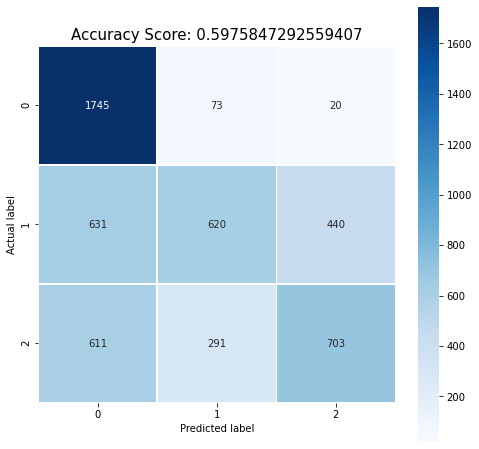

In [74]:
cm_gnb3 = confusion_matrix(y_test_res2, y_pred_gnb3)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_gnb3,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_gnb3 = 'Accuracy Score: {0}'.format(gnb3.score(X_test_res2, y_test_res2))
plt.title(all_sample_title_gnb3, size = 15)

# plt.savefig("one.png")

### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Rf3=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
Rf3.fit(X_train_res2,y_train_res2)

RandomForestClassifier()

In [76]:
# Predicting the values of test data
y_pred_Rf3 = Rf3.predict(X_test_res2)
print("Classification report - \n", classification_report(y_test_res2,y_pred_Rf3))

Classification report - 
               precision    recall  f1-score   support

      benign       0.99      0.99      0.99      1838
heavy_attack       0.86      0.83      0.84      1691
light_attack       0.83      0.86      0.85      1605

    accuracy                           0.90      5134
   macro avg       0.89      0.89      0.89      5134
weighted avg       0.90      0.90      0.90      5134



Text(0.5, 1.0, 'Accuracy Score: 0.8963770938839112')

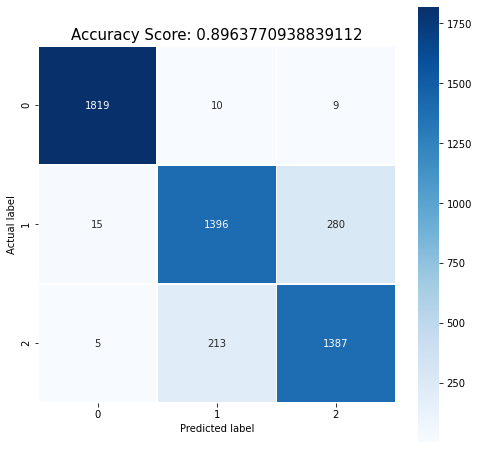

In [77]:
cm_Rf3 = confusion_matrix(y_test_res2, y_pred_Rf3)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_Rf3,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_Rf3 = 'Accuracy Score: {0}'.format(Rf3.score(X_test_res2, y_test_res2))
plt.title(all_sample_title_Rf3, size = 15)

# plt.savefig("one.png")

### Adaboost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc3 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
abc3.fit(X_train_res2, y_train_res2)

AdaBoostClassifier(learning_rate=1)

In [79]:
# Predicting the values of test data
y_pred_abc3 = abc3.predict(X_test_res2)
print("Classification report - \n", classification_report(y_test_res2, y_pred_abc3))

Classification report - 
               precision    recall  f1-score   support

      benign       0.92      0.91      0.91      1838
heavy_attack       0.67      0.60      0.64      1691
light_attack       0.64      0.71      0.67      1605

    accuracy                           0.75      5134
   macro avg       0.74      0.74      0.74      5134
weighted avg       0.75      0.75      0.75      5134



Text(0.5, 1.0, 'Accuracy Score: 0.7481495909622127')

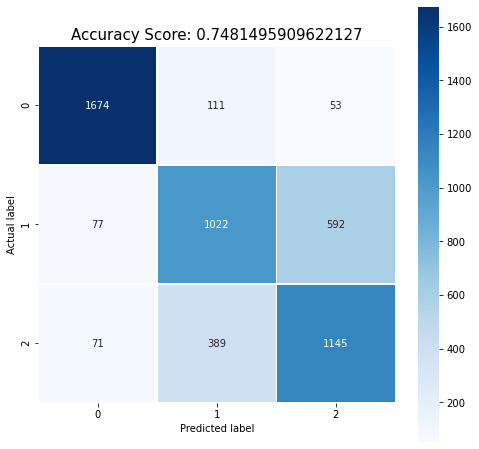

In [80]:
cm_abc3 = confusion_matrix(y_test_res2, y_pred_abc3)
plt.figure(figsize=(8,8))

sns.heatmap(data=cm_abc3,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt="d")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title_abc3 = 'Accuracy Score: {0}'.format(abc3.score(X_test_res2, y_test_res2))
plt.title(all_sample_title_abc3, size = 15)

# plt.savefig("one.png")